[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/02-Evaluacion.ipynb)

# Introducción al Preprocesamiento de datos

En esta notebook nos centraremos en los datos, preprocesamiento y evaluación. Dejaremos los algoritmos para sesiones posteriores.

*Lavar y picar ingredientes antes de cocinar (y también saber evaluar la comida)*

Así como en cocina no basta con seguir una receta, sino que hay que evaluar el sabor, la textura y el aroma para ajustar sal, acidez o picor, en ML las métricas de evaluación son como "probar la comida". Un chef que no prueba su comida podría servir algo muy bonito pero incomible

Aprenderemos:

* Evaluación de resultados.

En estas notebooks usaremos la siguiente notación para mejor organización.

* 🔽 Esta sección no forma parte del proceso usual de Machine Learning. Es una exploración didáctica de algún aspecto del funcionamiento del algoritmo.
* ⚡ Esta sección incluye técnicas más avanzadas destinadas a optimizar o profundizar en el uso de los algoritmos.
* ⭕ Esta sección contiene un ejercicio o práctica a realizar. Aún si no se establece una fecha de entrega, es muy recomendable realizarla para practicar conceptos clave de cada tema.

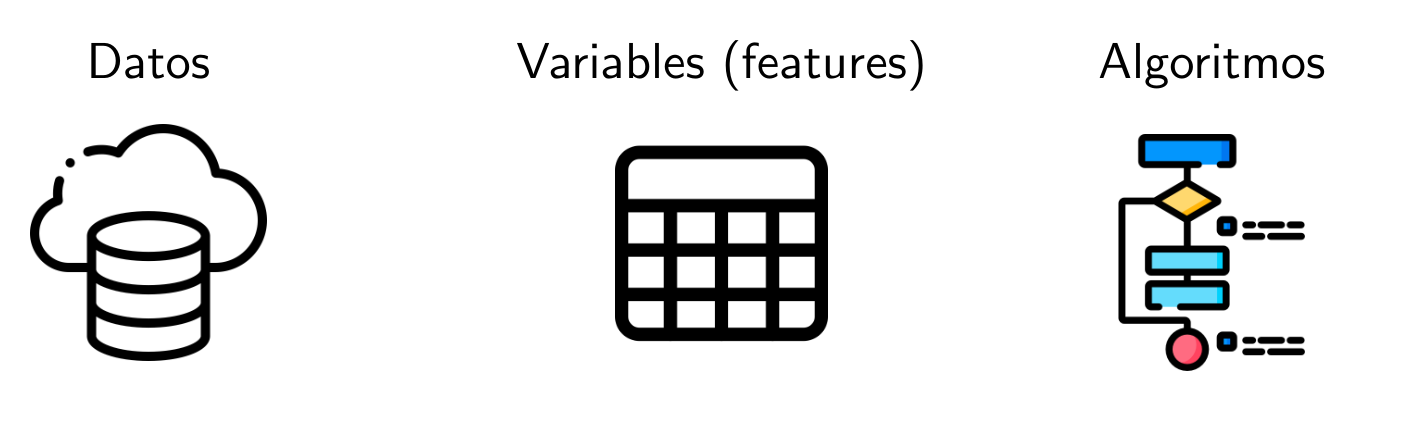

##Scikit-Learn

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/54/Scikit_learn_logo.svg/621px-Scikit_learn_logo.svg.png)

Librería muy usada para el Machine Learning en Python. Este proyecto fue iniciado en 2007 por David Cournapeau como parte del Google Summer of Code. En 2010, Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort y Vincent Michel, del INRIA, tomaron las riendas del proyecto e hicieron pública la primera versión el 1 de febrero de 2010.

La librería tiene una gran cantidad de algoritmos para muchos propósitos, desde el pre-procesamiento, el entrenamiento y optimización de modelos, métricas de desempeño, funciones de pérdida, etc. Las diferentes clases tiene un uso estandarizado e interactúan fácilmente entre ellas.

Guía de uso: https://scikit-learn.org/stable/user_guide.html

Documentación: https://scikit-learn.org/stable/

In [ ]:
import sklearn

**Referencias**

* Flach, P. A., 2012. Machine Learning : the Art and Science of Algorithms That Make Sense of Data. Cambridge University Press.

* Müller, A. C., \& Guido, S., 2016. Introduction to Machine Learning with Python: a Guide for Data Scientists. O'Reilly Media, Inc..

* García, S., Luengo, J., & Herrera, F., 2015. Data preprocessing in data mining (pp. 195-243). Cham, Switzerland: Springer International Publishing.

# Evaluación y rendimiento

In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/gmauricio-toledo/NLP-LCC/main/Rest-Mex/Rest-Mex_2025_train.csv"
df = pd.read_csv(url)
df

,Title,Review,Polarity,Town,Region,Type
0,Mi Lugar Favorito!!!!,Excelente lugar para comer y pasar una buena n...,5.0,Sayulita,Nayarit,Restaurant
1,lugares interesantes para visitar,"andar mucho, así que un poco difícil para pers...",4.0,Tulum,QuintanaRoo,Attractive
2,No es el mismo Dreams,"Es nuestra cuarta visita a Dreams Tulum, elegi...",3.0,Tulum,QuintanaRoo,Hotel
3,un buen panorama cerca de CancÃºn,"Estando en CancÃºn, fuimos al puerto y tomamos...",4.0,Isla_Mujeres,QuintanaRoo,Attractive
4,El mejor,Es un lugar antiguo y por eso me encanto tiene...,5.0,Patzcuaro,Michoacan,Hotel
...,...,...,...,...,...,...
208046,"excelente ambiente, comida y atencion","Excelente Restaurante, comida Mexicana de alto...",5.0,Tequisquiapan,Queretaro,Restaurant
208047,Muy mal servicio,Estuvimos allí como huéspedes de un día a la p...,2.0,Tulum,QuintanaRoo,Hotel
208048,Excelente,"Excelente comida, así como la atención y servi...",5.0,Ixtapan_de_la_Sal,Estado_de_Mexico,Restaurant
208049,Visita nocturna,Nos toco visitar este sitio cuando ya había ca...,4.0,Creel,Chihuahua,Attractive


In [24]:
from sklearn.model_selection import train_test_split

df1 = df[df['Polarity']==2.0].sample(4)
df2 = df[df['Polarity']==4.0].sample(4)
toy_dataset_df = pd.concat([df1, df2])
toy_dataset_df = toy_dataset_df[['Review','Polarity']]
toy_dataset_df = toy_dataset_df.sample(frac=1)
toy_dataset_df.reset_index(drop=True, inplace=True)
toy_dataset_df[['Review']]

,Review
0,Hace poco me alojé en el hotel Dreams Tulum pa...
1,"Ver como las olas rompen, la infinidad del océ..."
2,Nos guiamos por los comentarios de TripAdvisor...
3,"El hotel está en una excelente ubicación, no t..."
4,La Ventanilla es un pueblo costero ubicado apr...
5,"He visitado este Hostal en más de 3 ocasiones,..."
6,Gran lugar de desayuno frente a la plaza. Exce...
7,"Excelente lugar para descansar y relajarte, la..."


In [28]:
for text in toy_dataset_df['Review'].values:
    print(text,end='\n\n')

Hace poco me alojé en el hotel Dreams Tulum para la boda de un amigo y yo hicimos mi hija de cinco años para el viaje. Esta fue mi primera experiencia con un complejo de Sueños.  Cuando llegamos desde Chicago aún en invierno el clima uniforme nos informaron de que nuestra habitación no estaba preparada para nosotros, que me pareció un poco decepcionante, ya que estaba cerca de las 2:00 de la tarde, nos dijeron que teníamos que esperar una hora y volver, así que fuimos y me senté para algunos el almuerzo y todo mi hija quería hacer era nadar en la piscina o jugar en la arena y el mar. Esperamos pacientemente y volvimos a la recepción y me dijeron que aún sería otros 45 minutos, ahora me estaba poniendo un molesto porque todo lo que queríamos hacer era cambiar la ropa y relajarse.

Ver como las olas rompen, la infinidad del océano frente a ti  y y además los primeros rayos del sol tocan México ... Que más se puede pedir

Nos guiamos por los comentarios de TripAdvisor y fue una desilusió

In [35]:
import numpy as np

predicciones = np.array([ ])
assert predicciones.shape[0] == toy_dataset_df['Polarity'].values.shape[0]
print(predicciones)

[0 1 1 0 1 0 0 1]


Los valores reales de los reviews son:

In [36]:
y = toy_dataset_df['Polarity'].values.astype(int)
y[y==2] = 0
y[y==4] = 1
y

array([0, 1, 0, 0, 1, 0, 1, 1])

Ahora, importemos de `sklearn` las métricas de evaluación

Porcentaje de aciertos: 0.75


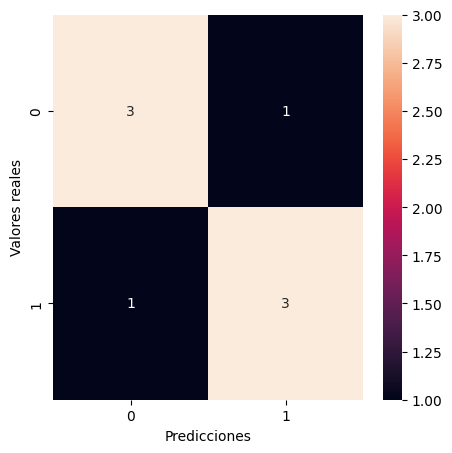

In [41]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(f"Porcentaje de aciertos: {accuracy_score(y, predicciones)}")
cm = confusion_matrix(y, predicciones)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [39]:
print(y)
print(predicciones)

[0 1 0 0 1 0 1 1]
[0 1 1 0 1 0 0 1]
